<div style="background: linear-gradient(to right, #000000, #1e3c72);
            color: #00ffff;
            font-weight: bold;
            padding: 20px;
            border-radius: 20px;
            text-align: center;
            font-size: 40px;
            text-shadow: 0 0 5px #00ffff, 0 0 10px #00ffff;">
  DATA SCIENCE STUDENTS MARK LIST ♨️
</div>

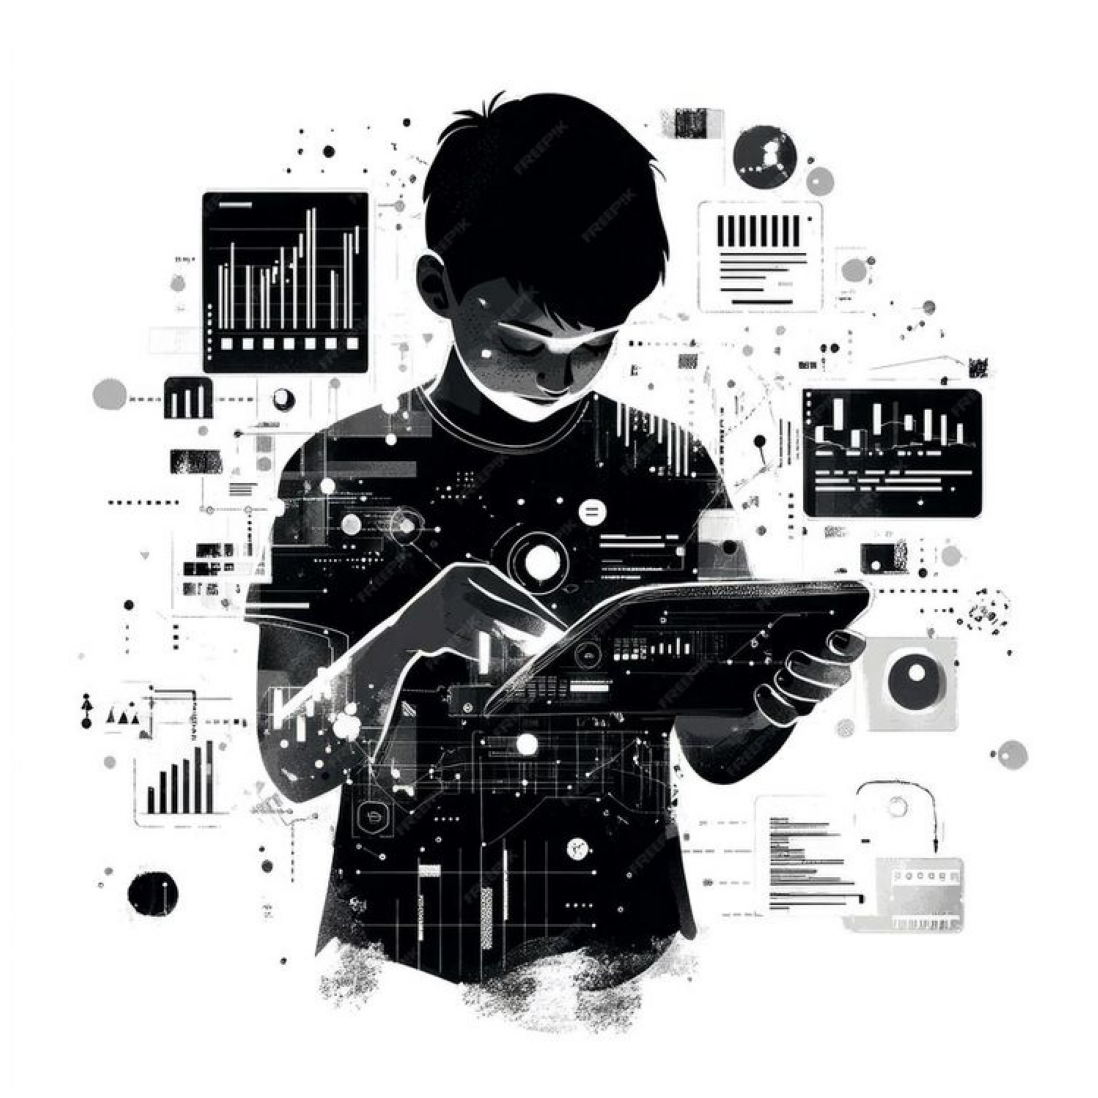

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\Ashfidha\Downloads\Untitled Folder\Unlocking the Power of Data Science_ Transforming Raw Data into Actionable Insights.jpeg")

plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')
plt.show()

<div style="background-color: #e5d4ff; 
            color: #4b0082; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
  📚 IMPORT LIBRARIES, ALGORITHMS, AND METRICS
</div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor 
import lightgbm as lgb
from tabulate import tabulate 
%matplotlib inline

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 7px; border-radius: 15px; text-align: center; font-size: 40px;">
LOAD DATASET
</div>

In [3]:
ds=pd.read_csv(r"C:\Users\Ashfidha\Downloads\data_science_student_marks.csv")

In [4]:
ds

,student_id,location,age,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks
0,4,Sydney,24,95,99,87,82,75
1,5,Tokyo,24,99,95,89,86,82
2,6,Berlin,22,72,70,99,79,77
3,7,London,23,97,90,74,72,85
4,8,Tokyo,22,91,71,79,80,75
...,...,...,...,...,...,...,...,...
492,496,New York,23,71,92,98,78,88
493,497,Los Angeles,20,90,100,90,78,73
494,498,Paris,22,78,80,78,71,70
495,499,Los Angeles,21,96,93,78,78,82


<style>
td, th { padding:10px; }
th { background:#8B0000; color:white; }
tr:nth-child(even) { background:#ffe6e6; }
tr:nth-child(odd) { background:#ffffff; }
</style>

<table>
<tr>
<th>Column Name</th><th>Description</th><th>Data Type</th><th>Purpose / Use</th>
</tr>
<tr><td><b>student_id</b></td><td>Unique ID for each student</td><td>Categorical / String</td><td>Identifies each student uniquely</td></tr>
<tr><td><b>location</b></td><td>Area/branch where the student belongs</td><td>Categorical</td><td>Compare performance across locations</td></tr>
<tr><td><b>age</b></td><td>Age of the student</td><td>Numeric</td><td>Demographic analysis</td></tr>
<tr><td><b>sql_marks</b></td><td>Marks scored in SQL</td><td>Numeric</td><td>Skill performance measurement</td></tr>
<tr><td><b>excel_marks</b></td><td>Marks scored in MS Excel</td><td>Numeric</td><td>Proficiency in Excel</td></tr>
<tr><td><b>python_marks</b></td><td>Marks scored in Python</td><td>Numeric</td><td>Evaluate coding skills</td></tr>
<tr><td><b>power_bi_marks</b></td><td>Marks scored in Power BI</td><td>Numeric</td><td>BI/dashboard skill evaluation</td></tr>
<tr><td><b>english_marks</b></td><td>Marks scored in English</td><td>Numeric</td><td>Communication skill</td></tr>
</table>


<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
CHECKING HEAD,COLUMNS,SHAPE,INFO,DESCRIBE,UNIQUE
</div>

In [5]:
ds.head()

,student_id,location,age,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks
0,4,Sydney,24,95,99,87,82,75
1,5,Tokyo,24,99,95,89,86,82
2,6,Berlin,22,72,70,99,79,77
3,7,London,23,97,90,74,72,85
4,8,Tokyo,22,91,71,79,80,75


In [6]:
ds.columns

Index(['student_id', 'location', 'age', 'sql_marks', 'excel_marks',
       'python_marks', 'power_bi_marks', 'english_marks'],
      dtype='object')

In [7]:
ds.shape

(497, 8)

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   student_id      497 non-null    int64 
 1   location        497 non-null    object
 2   age             497 non-null    int64 
 3   sql_marks       497 non-null    int64 
 4   excel_marks     497 non-null    int64 
 5   python_marks    497 non-null    int64 
 6   power_bi_marks  497 non-null    int64 
 7   english_marks   497 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 31.2+ KB


In [9]:
ds.describe(include='all')

,student_id,location,age,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks
count,497.000000,497,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
unique,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Tokyo,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN
mean,252.000000,NaN,21.380282,84.661972,85.384306,85.388330,84.545272,84.824950
std,143.615807,NaN,2.205714,8.745415,8.782497,8.878668,8.903066,9.060479
min,4.000000,NaN,18.000000,70.000000,70.000000,70.000000,70.000000,70.000000
25%,128.000000,NaN,20.000000,78.000000,78.000000,77.000000,77.000000,77.000000
50%,252.000000,NaN,21.000000,85.000000,86.000000,86.000000,84.000000,85.000000
75%,376.000000,NaN,23.000000,92.000000,93.000000,94.000000,92.000000,93.000000


In [10]:
for i in ds:
    print([i])
    print(ds[i].unique())
    print(ds[i].nunique())

['student_id']
[  4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 7px; border-radius: 15px; text-align: center; font-size: 40px;">
DATA-PREPROCESSING
</div>

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 7px; border-radius: 15px; text-align: center; font-size: 30px;">
MISSING VALUE HANDLING
</div>

In [11]:
ds.isnull().sum()

student_id        0
location          0
age               0
sql_marks         0
excel_marks       0
python_marks      0
power_bi_marks    0
english_marks     0
dtype: int64

In [12]:
ds.dtypes

student_id         int64
location          object
age                int64
sql_marks          int64
excel_marks        int64
python_marks       int64
power_bi_marks     int64
english_marks      int64
dtype: object

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
FEATURE ENGINEERING
</div>

In [13]:
cols = ['student_id', 'location', 'age', 'sql_marks', 'excel_marks',
        'python_marks', 'power_bi_marks', 'english_marks']

cols.append('total_marks')
print(cols)


['student_id', 'location', 'age', 'sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks', 'total_marks']


In [14]:
ds['total_marks'] = ds[['sql_marks','excel_marks','python_marks',
                        'power_bi_marks','english_marks']].sum(axis=1)


In [15]:
ds

,student_id,location,age,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks,total_marks
0,4,Sydney,24,95,99,87,82,75,438
1,5,Tokyo,24,99,95,89,86,82,451
2,6,Berlin,22,72,70,99,79,77,397
3,7,London,23,97,90,74,72,85,418
4,8,Tokyo,22,91,71,79,80,75,396
...,...,...,...,...,...,...,...,...,...
492,496,New York,23,71,92,98,78,88,427
493,497,Los Angeles,20,90,100,90,78,73,431
494,498,Paris,22,78,80,78,71,70,377
495,499,Los Angeles,21,96,93,78,78,82,427


In [16]:
ds.columns

Index(['student_id', 'location', 'age', 'sql_marks', 'excel_marks',
       'python_marks', 'power_bi_marks', 'english_marks', 'total_marks'],
      dtype='object')

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 42px;">
DATA VISUALIZATION
</div>

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 32px;">
1) UNIVARIATE ANALYSIS
</div>

<div style="background-color: lightblue; color: darkblue; font-weight: bold; padding: 7px; border-radius: 15px; text-align: center; font-size: 30px;">
HISTPLOT
</div>

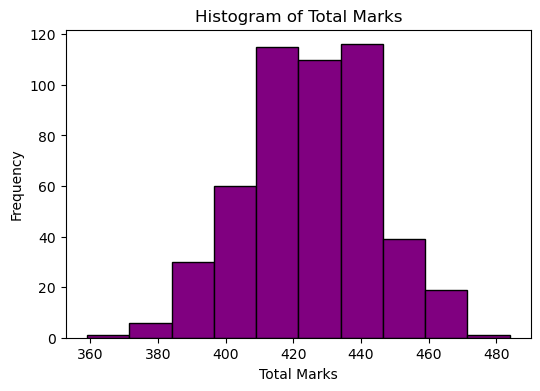

In [17]:
plt.figure(figsize=(6,4))
plt.hist(ds['total_marks'], bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Total Marks')
plt.xlabel('Total Marks')
plt.ylabel('Frequency')
plt.show()

<!-- <div style="background-color: #e5d4ff; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 20px;"> -->
The histogram shows that most students scored between 410 and 440 marks, forming a roughly bell-shaped distribution. Marks range from about 360 to 480
<!-- </div> -->

<div style="background-color: lightblue; color: darkblue; font-weight: bold; padding: 7px; border-radius: 15px; text-align: center; font-size: 30px;">
COUNTPLOT
</div>

C:\Users\Ashfidha\AppData\Local\Temp\ipykernel_15712\211313624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location', data=ds, palette='Purples')


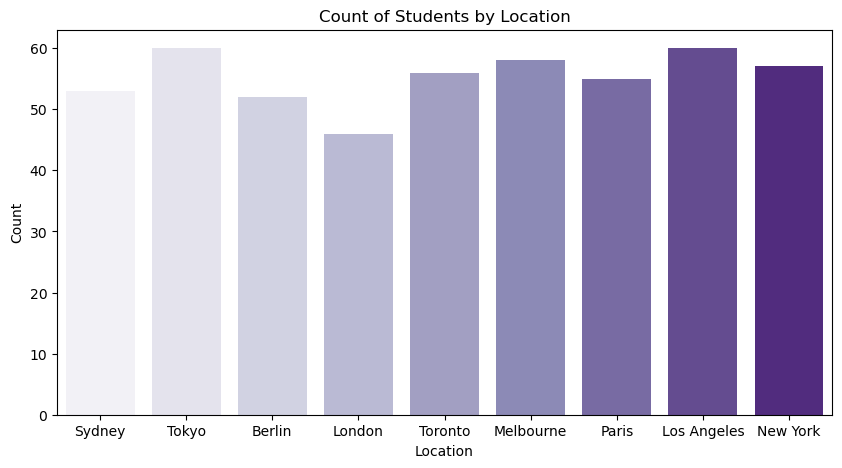

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='location', data=ds, palette='Purples')
plt.title('Count of Students by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

<!-- <div style="background-color: #e5d4ff; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 20px;"> -->
Los Angeles and Tokyo have the highest student counts while London has the lowest. Other locations such as New York, Melbourne, Toronto, Sydney, Berlin, and Paris have moderate and fairly similar student numbers
<!-- </div> -->

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 35px;">
2) BIVARIATE ANALYSIS
</div>

<div style="background-color: lightblue; color: darkblue; font-weight: bold; padding: 7px; border-radius: 15px; text-align: center; font-size: 30px;">
BOXPLOT
</div>

C:\Users\Ashfidha\AppData\Local\Temp\ipykernel_15712\1880466091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='python_marks', data=ds, palette=colors)
C:\Users\Ashfidha\AppData\Local\Temp\ipykernel_15712\1880466091.py:3: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='location', y='python_marks', data=ds, palette=colors)


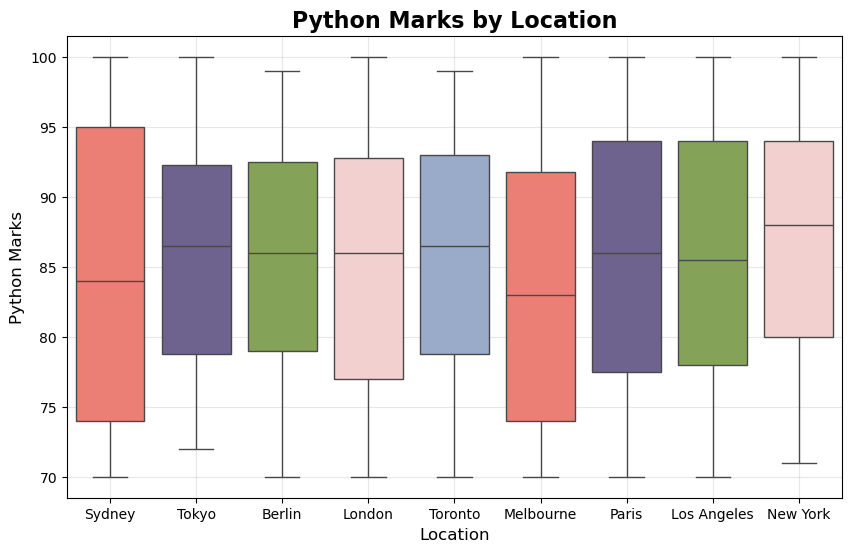

In [19]:
plt.figure(figsize=(10,6))
colors = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9", "#92a8d1"]  
sns.boxplot(x='location', y='python_marks', data=ds, palette=colors)
plt.title('Python Marks by Location', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Python Marks', fontsize=12)
plt.grid(alpha=0.3)  # optional subtle grid for aesthetics
plt.show()

#### Python scores across all locations are similar  with medians around the mid-80s to 90s and ranges from about 70 to 100.


<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 35px;">
3) MULTIVARIATE ANALYSIS
</div>

<div style="background-color: lightblue; color: darkblue; font-weight: bold; padding: 7px; border-radius: 15px; text-align: center; font-size: 30px;">
HEATMAP
</div>

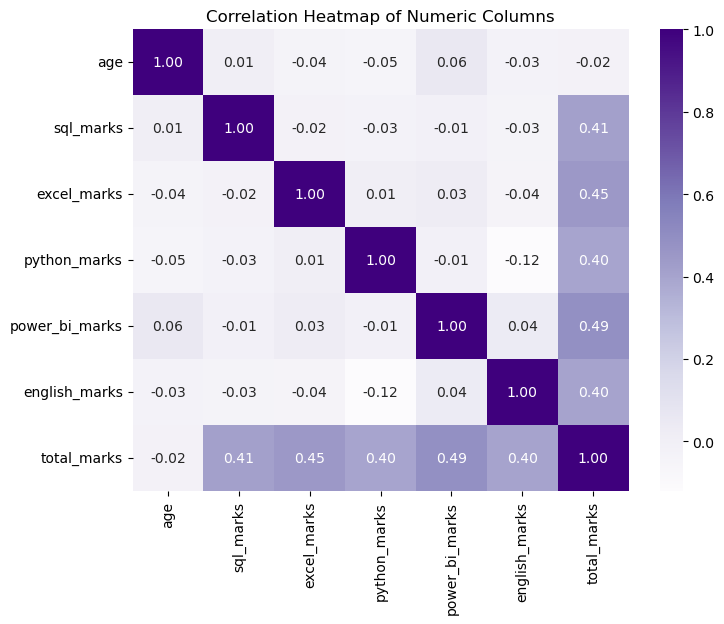

In [20]:
numeric_cols = ['age', 'sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks', 'total_marks']
corr = ds[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Purples', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

#### Power BI and Excel have the strongest links to total marks. Age shows almost no correlation with any marks. Overall, the correlations are weak to moderate across subjects.


<div style="background-color: lightblue; color: darkblue; font-weight: bold; padding: 7px; border-radius: 15px; text-align: center; font-size: 30px;">
PAIRPLOT
</div>

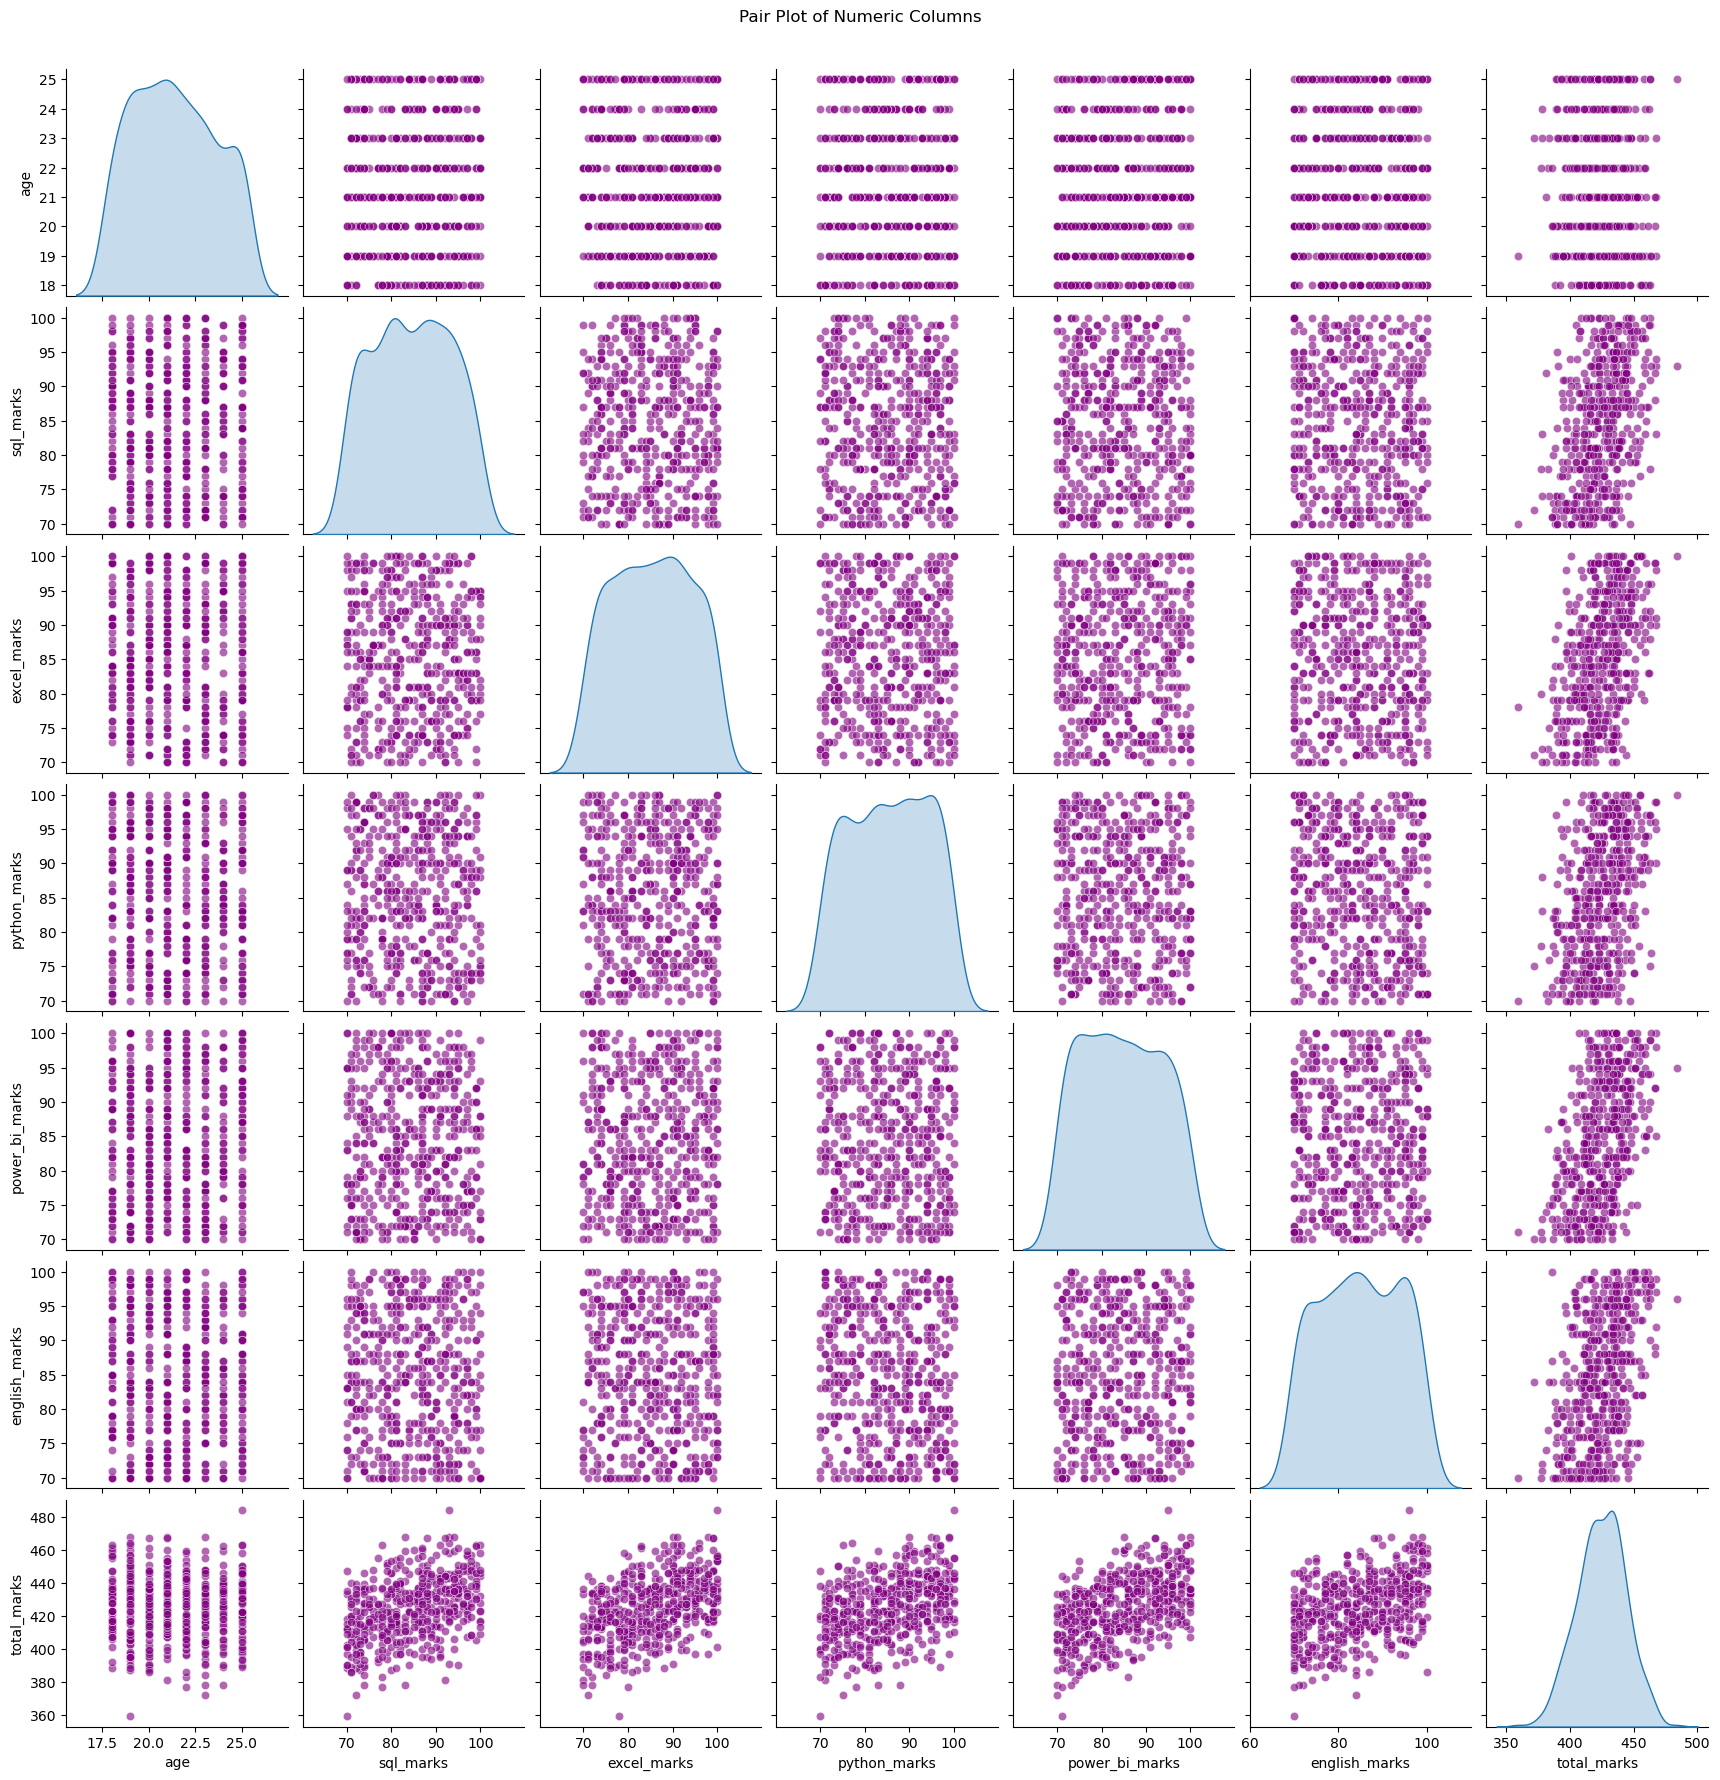

In [21]:
numeric_cols = ['age', 'sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks', 'total_marks']
sns.pairplot(ds[numeric_cols], diag_kind='kde', plot_kws={'alpha':0.6, 'color':'purple'})
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

<!-- <!-- <div style="background-color: #e5d4ff; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 17px;"> -->
Subject marks (SQL, Excel, Python, Power BI, English) are mostly spread between 60 and 100, with smooth densities. -->
Total marks show a rising density curve between 300 and 500, indicating most students score in that range.
Age values are between 17 and 25, uniformly distributed.
Students who score high in one subject do not necessarily score high in another.
As scores in SQL, Excel, Python, Power BI, or English increase, total marks increase accordingly.
This confirms that total marks are correctly derived by summing individual subject scores.
Age does not show any correlation with any subject marks or total marks.
Students across all ages perform similarly.
<!-- </div> -->

In [22]:
ds=ds.drop(columns=['location', 'age'])

In [23]:
ds

,student_id,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks,total_marks
0,4,95,99,87,82,75,438
1,5,99,95,89,86,82,451
2,6,72,70,99,79,77,397
3,7,97,90,74,72,85,418
4,8,91,71,79,80,75,396
...,...,...,...,...,...,...,...
492,496,71,92,98,78,88,427
493,497,90,100,90,78,73,431
494,498,78,80,78,71,70,377
495,499,96,93,78,78,82,427


<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
SCALING
</div>

In [24]:
scaler = MinMaxScaler()

In [25]:
df= scaler.fit_transform(ds)

In [26]:
ds=pd.DataFrame(df,columns=ds.columns)
ds

,student_id,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks,total_marks
0,0.000000,0.833333,0.966667,0.566667,0.400000,0.166667,0.632
1,0.002016,0.966667,0.833333,0.633333,0.533333,0.400000,0.736
2,0.004032,0.066667,0.000000,0.966667,0.300000,0.233333,0.304
3,0.006048,0.900000,0.666667,0.133333,0.066667,0.500000,0.472
4,0.008065,0.700000,0.033333,0.300000,0.333333,0.166667,0.296
...,...,...,...,...,...,...,...
492,0.991935,0.033333,0.733333,0.933333,0.266667,0.600000,0.544
493,0.993952,0.666667,1.000000,0.666667,0.266667,0.100000,0.576
494,0.995968,0.266667,0.333333,0.266667,0.033333,0.000000,0.144
495,0.997984,0.866667,0.766667,0.266667,0.266667,0.400000,0.544


<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
MODEL BUILDING
</div>

In [27]:
x = ds.drop(columns=['total_marks']) 
x

,student_id,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks
0,0.000000,0.833333,0.966667,0.566667,0.400000,0.166667
1,0.002016,0.966667,0.833333,0.633333,0.533333,0.400000
2,0.004032,0.066667,0.000000,0.966667,0.300000,0.233333
3,0.006048,0.900000,0.666667,0.133333,0.066667,0.500000
4,0.008065,0.700000,0.033333,0.300000,0.333333,0.166667
...,...,...,...,...,...,...
492,0.991935,0.033333,0.733333,0.933333,0.266667,0.600000
493,0.993952,0.666667,1.000000,0.666667,0.266667,0.100000
494,0.995968,0.266667,0.333333,0.266667,0.033333,0.000000
495,0.997984,0.866667,0.766667,0.266667,0.266667,0.400000


In [28]:
y = ds['total_marks']  
y

0      0.632
1      0.736
2      0.304
3      0.472
4      0.296
       ...  
492    0.544
493    0.576
494    0.144
495    0.544
496    0.496
Name: total_marks, Length: 497, dtype: float64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
model=LinearRegression()

In [31]:
model=model.fit(x_train,y_train)

In [32]:
y_pred=model.predict(x_test)

In [33]:
r2=r2_score(y_test,y_pred)
r2

1.0

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
RANDOM FOREST
</div>

In [34]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

In [35]:
model2=model2.fit(x_train,y_train)

In [36]:
y_pred2=model2.predict(x_test)

In [37]:
r3=r2_score(y_test,y_pred2)
r3

0.8943866378963536

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
DECISION TREE
</div>

In [38]:
model3 = DecisionTreeRegressor(criterion="squared_error",random_state=100, max_depth=3, min_samples_leaf=5)
model3=model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
r4=r2_score(y_test,y_pred3)
r4

0.26034755096043793

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
SVM
</div>

In [39]:
svr_linear=SVR(kernel='linear')

In [40]:
svr_linear=svr_linear.fit(x_train,y_train)

In [41]:
y_svrl=svr_linear.predict(x_test)

In [42]:
r5=r2_score(y_test,y_svrl)
r5

0.9169738267569636

In [43]:
svr_rbf=SVR(kernel='rbf')

In [44]:
svr_rbf=svr_rbf.fit(x_train,y_train)

In [45]:
y_svr=svr_rbf.predict(x_test)

In [46]:
r6=r2_score(y_test,y_svr)
r6

0.890912302940273

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
KNN
</div>

In [47]:
meteric_k=[]
neighbors=np.arange(3,15)

In [48]:
for k in neighbors:
    regressor=KNeighborsRegressor(n_neighbors=k,metric='euclidean')
    regressor=regressor.fit(x_train,y_train)
    prediction=regressor.predict(x_test)
    r7=r2_score(y_test,prediction)
    meteric_k.append(r7)

plt.plot(neighbors,meteric_k,'o-')
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.grid()

In [49]:
regressor=KNeighborsRegressor(n_neighbors=9,metric='euclidean')
knn=regressor.fit(x_train,y_train)
prediction=regressor.predict(x_test)

In [50]:
knn_acc= r2_score(y_test,prediction)
knn_acc

0.89526522462923

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
RIDGE
</div>

In [51]:
from sklearn.linear_model import Ridge

In [52]:
model8=Ridge(alpha=1.0)

In [53]:
model8.fit(x_train, y_train)

Ridge()

In [54]:
y_predr=model8.predict(x_test)

In [55]:
rr=r2_score(y_test,y_predr)
rr

0.9990804127412011

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
LASSO
</div>

In [56]:
from sklearn.linear_model import Lasso

In [57]:
model9=Lasso(alpha=0.1)

In [58]:
model9.fit(x_train, y_train)

Lasso(alpha=0.1)

In [59]:
y_predl=model9.predict(x_test)

In [60]:
rl=r2_score(y_test,y_predl)
rl

-0.0014115421568343667

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 12px; border-radius: 15px; text-align: center; font-size: 35px;">
XGBOOST, CATBOOST, LIGHTGBM ,GRADIENTBOOST
</div>

In [61]:
model_xgb = XGBRegressor()

In [62]:
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [63]:
y_pred4=model_xgb.predict(x_test)

In [64]:
r8=r2_score(y_test,y_pred4)
r8

0.8944607703062785

In [65]:
model_cat = CatBoostRegressor(verbose=0)

In [66]:
model_cat.fit(x_train, y_train)

In [67]:
y_pred5 = model_cat.predict(x_test)

In [68]:
r9=r2_score(y_test,y_pred5)
r9

0.9855768211503705

In [69]:
model_lgb = lgb.LGBMRegressor(verbose=-1)

In [70]:
model_lgb.fit(x_train, y_train)

C:\Users\Ashfidha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Ashfidha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Ashfidha\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ashfidha\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^

LGBMRegressor(verbose=-1)

In [71]:
y_pred6=model_lgb.predict(x_test)

In [72]:
r10=r2_score(y_test,y_pred6)
r10

0.9542957515750616

In [73]:
gb = GradientBoostingRegressor()

In [74]:
gb.fit(x_train, y_train)
r11 = gb.score(x_test, y_test)

In [75]:
r11

0.9542679429065198

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
Tabulate
</div>

In [76]:
from tabulate import tabulate

In [77]:
table = [
    ['Model', 'Accuracy'],
    ['Linear Regression', r2],
    ['Random Forest', r3],
    ['Decision Tree', r4],
    ['KNN', knn_acc],
    ['RIDGE', rr],
    ['LASSO', rl],
    ['XGB', r8],
    ['CAT_Boost', r9],
    ['LIGHT_Boost', r10],
    ['GRADIENT', r11]# corrected variable name
]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤═════════════╕
│ Model             │    Accuracy │
╞═══════════════════╪═════════════╡
│ Linear Regression │  1          │
├───────────────────┼─────────────┤
│ Random Forest     │  0.894387   │
├───────────────────┼─────────────┤
│ Decision Tree     │  0.260348   │
├───────────────────┼─────────────┤
│ KNN               │  0.895265   │
├───────────────────┼─────────────┤
│ RIDGE             │  0.99908    │
├───────────────────┼─────────────┤
│ LASSO             │ -0.00141154 │
├───────────────────┼─────────────┤
│ XGB               │  0.894461   │
├───────────────────┼─────────────┤
│ CAT_Boost         │  0.985577   │
├───────────────────┼─────────────┤
│ LIGHT_Boost       │  0.954296   │
├───────────────────┼─────────────┤
│ GRADIENT          │  0.954268   │
╘═══════════════════╧═════════════╛


<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
HYPER PARAMETER TUNING
</div>

In [78]:
ridge = Ridge()

In [79]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'sparse_cg', 'sag', 'saga'],
    'fit_intercept': [True, False]
}

In [80]:
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='r2')

In [81]:

print("Best alpha:", grid.best_params_['alpha'])
print("Best solver:", grid.best_params_['solver'])
print("Best fit_intercept:", grid.best_params_['fit_intercept'])
print("Best R² score:", grid.best_score_)

Best alpha: 0.01
Best solver: saga
Best fit_intercept: True
Best R² score: 0.9999998380092547


In [82]:
MODEL=Ridge(alpha=0.01,solver='auto',fit_intercept=True)

In [83]:
MODEL.fit(x_train, y_train)

Ridge(alpha=0.01)

In [84]:
y_pred7=MODEL.predict(x_test)

In [85]:
r12=r2_score(y_test,y_pred7)
r12

0.99999990220475

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
REGRESSION METRICS
</div>

In [86]:
mse=mean_squared_error(y_test,y_pred)
mse

3.8896081156844617e-32

In [87]:
mae=mean_absolute_error(y_test,y_pred)
mae

1.534883331544279e-16

In [88]:
rmse=np.sqrt(mse)
rmse

np.float64(1.9722089432117636e-16)

<div style="background-color: lightgreen; color: darkblue; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 40px;">
PREDICTION
</div>

In [89]:
new=[[0.000000,0.833333,0.966667,0.566667,0.400000,0.166667]]

In [90]:
predicted=model.predict(new)
predicted

C:\Users\Ashfidha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.63200016])